In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv', index_col=0)
#data.dtypes
df = data
#df = data.astype(int)
df.dtypes


blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64
redDeaths                         int64


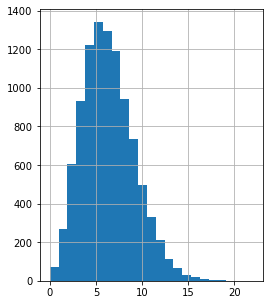

In [3]:
data['blueDeaths'].hist(figsize=(4,5), bins=23)


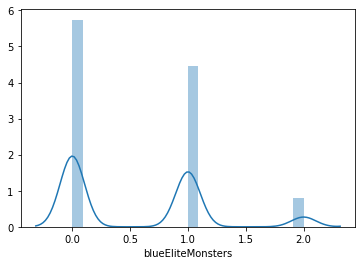

In [4]:
import seaborn as sns, numpy as np
from scipy.stats import *

dist_names = ['weibull_min','norm','weibull_max','beta', 'invgauss','uniform','gamma','expon','lognorm','pearson3','triang']
x = df['blueEliteMonsters']
sns.distplot(x, hist=2)
#sns.distplot(x, kde=True, rug=True, color='blue')
#sns.distplot(x, kde=True, kde_kws={'bw':1})
#ax = sns.distplot(x, fit=lognorm, kde=False)

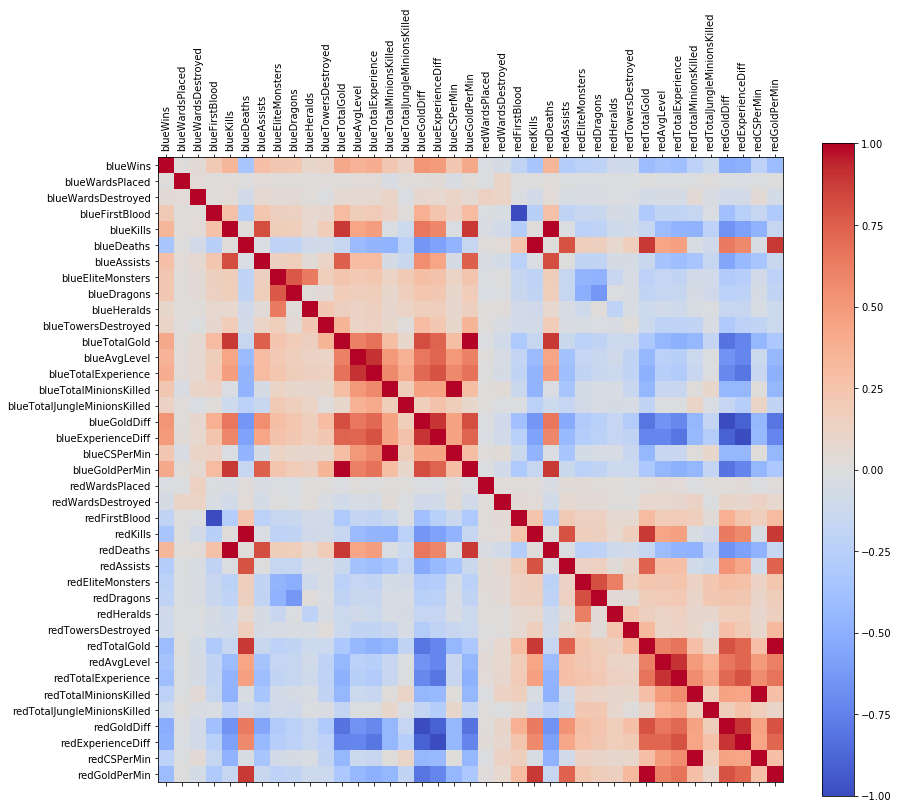

In [5]:
corr = data.corr()
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
data = pd.read_csv('/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv', index_col=0)

dist_names = ['weibull_min','norm','weibull_max','beta', 'invgauss','uniform','gamma','expon','lognorm','pearson3','triang']

y = data['redAvgLevel']
y_std = data['redAvgLevel']
size = 9879
data.dtypes

blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64
redDeaths                         int64


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
data = pd.read_csv('/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv', index_col=0)

dist_names = ['weibull_min','norm','weibull_max','beta', 'invgauss','uniform','gamma','expon','lognorm','pearson3','triang']



y = data['redGoldPerMin']
y_std = data['redGoldPerMin']
size = 9879

chi_square_statistics = []
# 11 equi-distant bins of observed Data 
percentile_bins = np.linspace(0,100,11)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    print("{}\n{}\n".format(dist, param))


    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print ('\nDistributions listed by Betterment of fit:')
print ('............................................')
print (results)

(0.13935259627516094, 1121.1999999999998, 1.5839481854663833)

(1648.9041400951514, 149.08129463561417)

(0.13683426325361425, 2273.2000000000003, 1.7368091525608766)

(24.44850971181957, 3665.5272872881906, 908.7689674801477, 111713.99517295847)

(0.8112880910837665, 1095.5648023020258, 705.2253474478425)

(1121.2, 1151.9999999999998)

(26.29463892553074, 885.2875880253689, 29.04076915838021)

(1121.2, 527.7041400951514)

(0.13639913497313694, 561.1303531853194, 1077.7008213324239)

(0.39002867023304433, 1648.9040871987886, 148.91612112062955)

(0.42466640103120257, 1121.0319640833527, 1152.3587435836735)


Distributions listed by Betterment of fit:
............................................
   Distribution     chi_square
8       lognorm       1.197780
3          beta       1.695423
9      pearson3       1.947733
6         gamma       1.947777
1          norm      77.009554
10       triang    2342.255181
5       uniform    7523.149825
4      invgauss   21108.444396
7         expon  

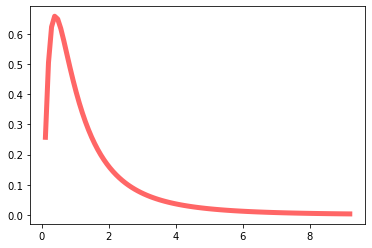

In [8]:
################## DISTRIBUCIÓN LOGARÍTMICA ####################
from scipy.stats import lognorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
s = 0.954
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')
log_norm = np.linspace(lognorm.ppf(0.01, s),
                lognorm.ppf(0.99, s), 100)
ax.plot(log_norm, lognorm.pdf(log_norm, s),
       'r-', lw=5, alpha=0.6, label='lognorm pdf')

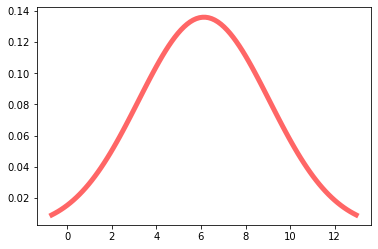

In [9]:
################## DISTRIBUCIÓN NORMAL ####################
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
atrib1, atrib2 = (6.137665755643284, 2.933669217839129)
mean, var, skew, kurt = norm.stats(moments='mvsk')
normal = np.linspace(norm.ppf(0.01, atrib1, atrib2), norm.ppf(0.99, atrib1, atrib2), 100)
#normal = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(normal, norm.pdf(normal, atrib1, atrib2),
       'r-', lw=5, alpha=0.6, label='lognorm pdf')

#ax.plot(normal, norm.pdf(normal),
#       'r-', lw=5, alpha=0.6, label='norm pdf')


AttributeError: 'AxesSubplot' object has no attribute 'distplot'

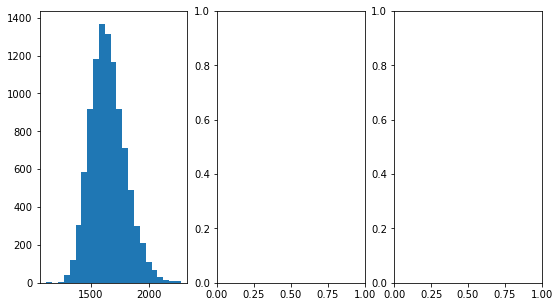

In [10]:
from scipy.stats import *
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))# Histogram Plot of Observed Data
axes[0].hist(y, bins=23) #Exponential Distribution Fitting
#axes[1].plot(x,lognorm.pdf(x,s)) #logarítmica
#axes[1].plot(x,lognorm.pdf(x,9.845878538930616, -2.8742582688262213e-27, 1.498670282130083)) #logarítmica
#axes[1].plot(x,norm.pdf(x,atrib1,atrib2)) #normal
#axes[1].plot(norm.pdf(normal,atrib1-2,atrib2-1)) #normal
axes[1].distplot(y,kde=True)
axes[2].boxplot([y])
#axes[2].plot(y,invgauss.pdf(y_std,0.5540026918528511, 5.684206197128368, 30.11492547500846))
#sns.distplot(x, kde=True, rug=False, color='blue', bins=23, kde_kws={'bw':1})
fig.tight_layout()

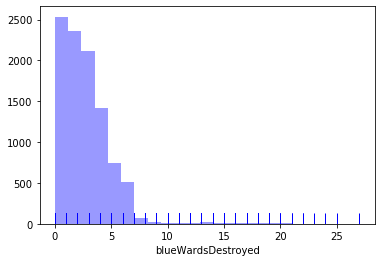

In [11]:
grafica = df['blueWardsDestroyed']
#sns.distplot(grafica, kde=True, rug=True, color='blue', bins=3, kde_kws={'bw':1})
sns.distplot(grafica, kde=False, rug=True, color='b', bins= 23)
#sns.distplot(x, kde=False, rug=True, color='blue', bins=2, fit=lognorm, kde_kws={'bw':0.2})

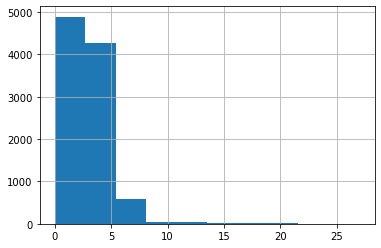

In [12]:
df['blueWardsDestroyed'].hist()

In [13]:
df.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [14]:
file.remove("/kaggle/working/blueAssists")

NameError: name 'file' is not defined

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fi

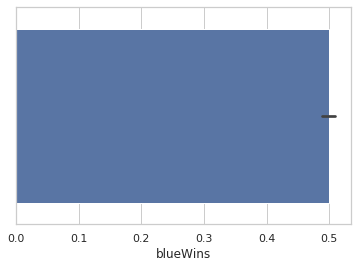

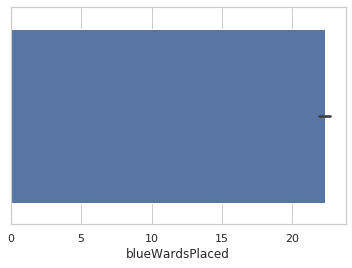

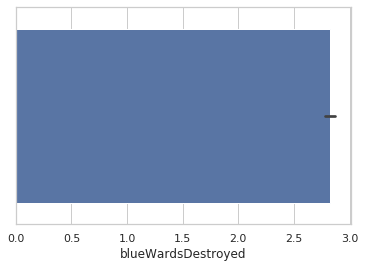

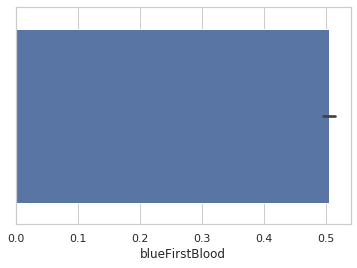

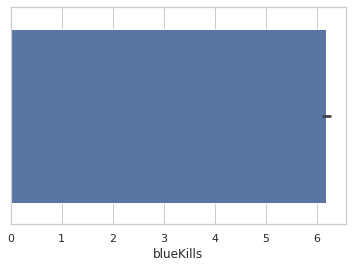

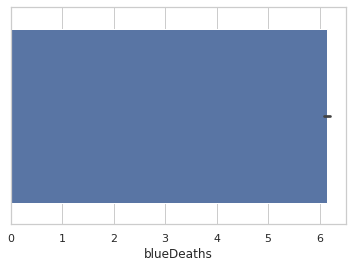

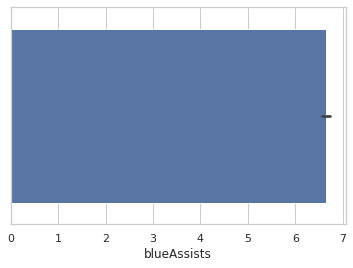

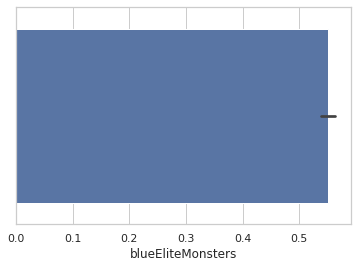

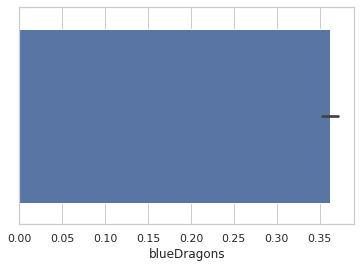

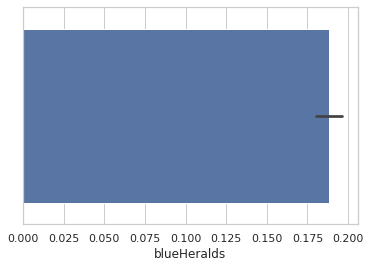

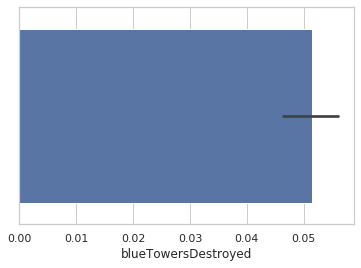

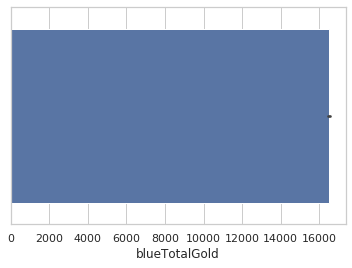

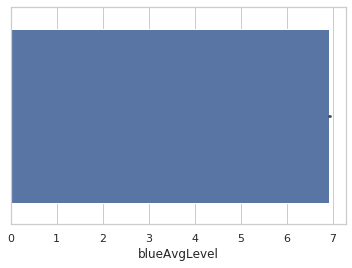

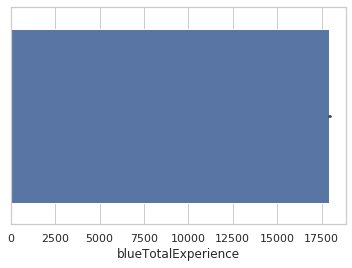

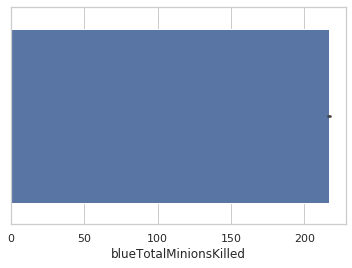

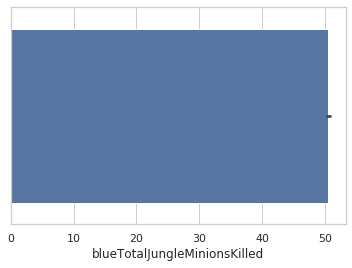

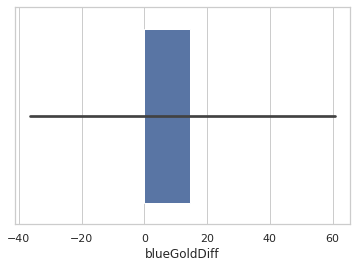

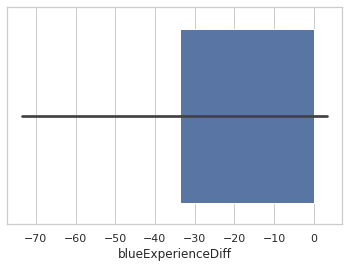

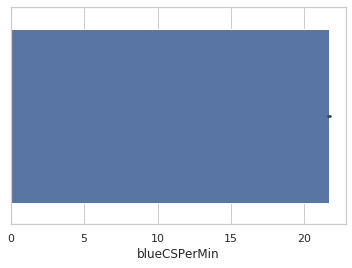

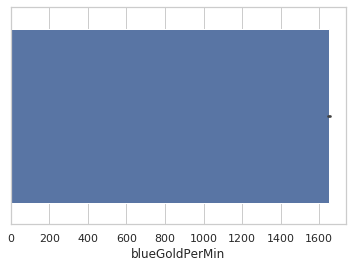

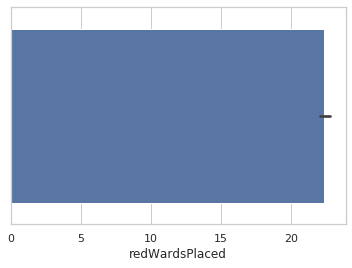

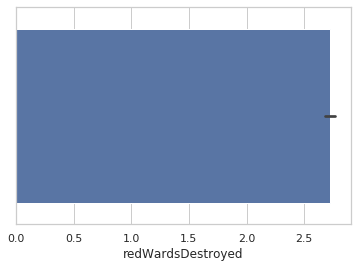

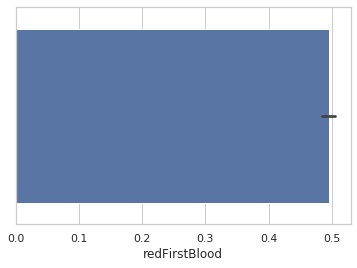

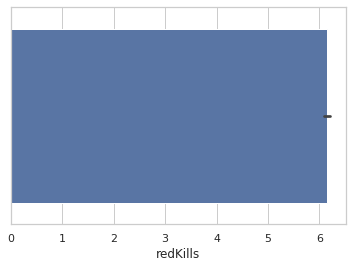

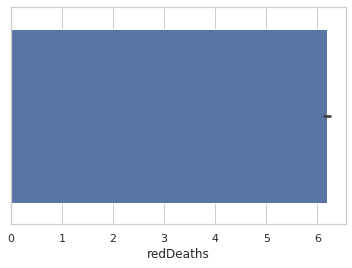

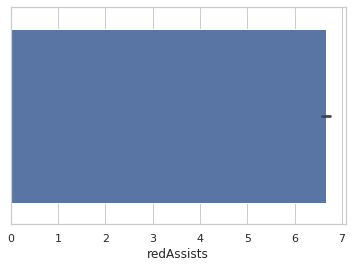

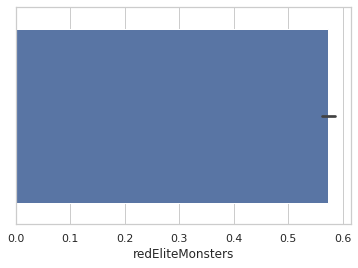

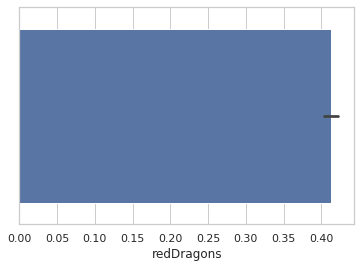

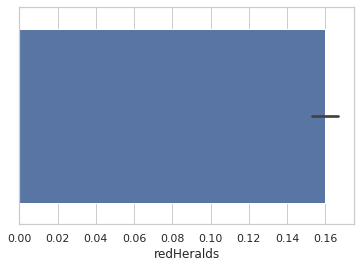

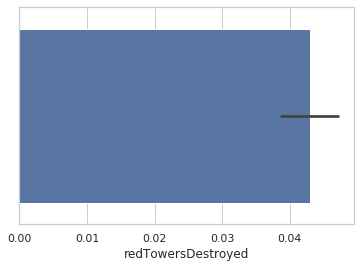

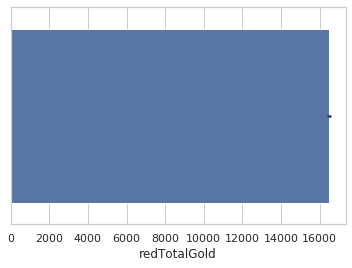

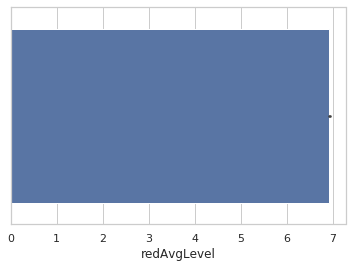

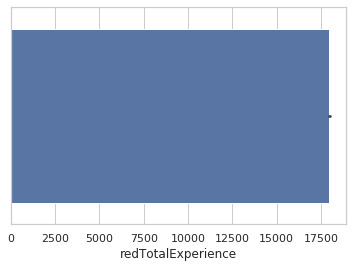

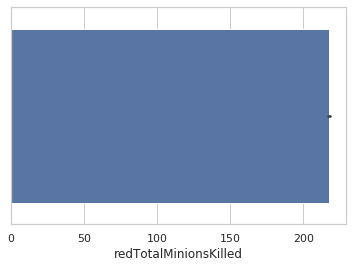

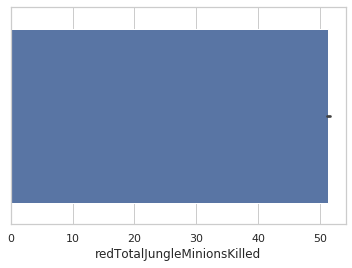

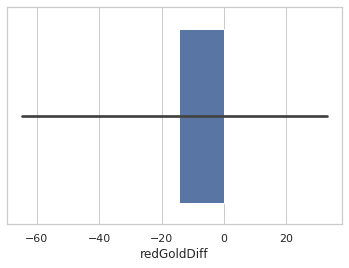

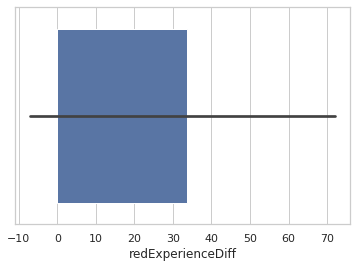

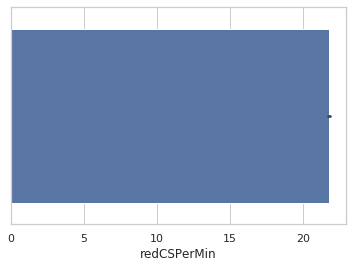

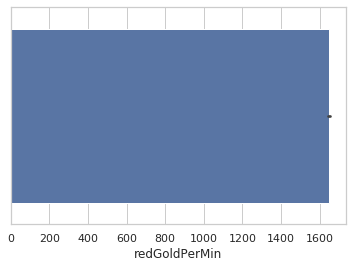

In [15]:
import seaborn as sns
sns.set(style="whitegrid")
#ax = sns.boxplot(x=df["blueKills"])


for column in df:
    plt.figure()
    #df.boxplot([column])
    ax = sns.barplot(x=df[column])
    #df[column].plot.scatter(x="num",y="total")
    #plt.savefig(column, format="svg")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fi

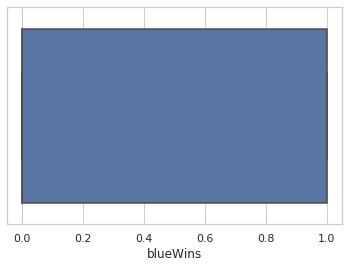

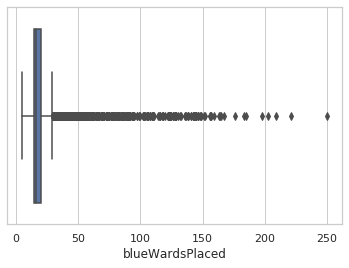

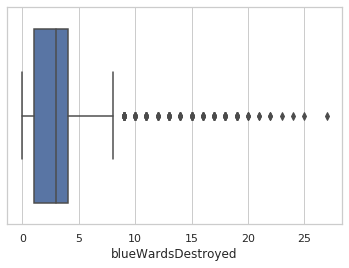

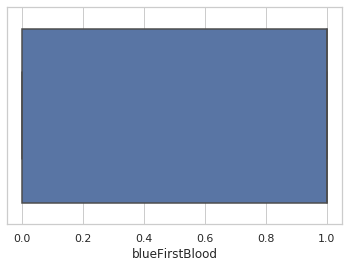

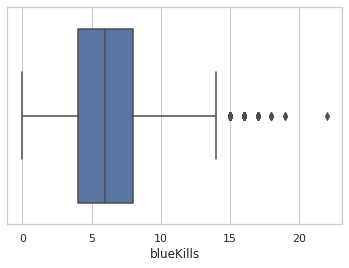

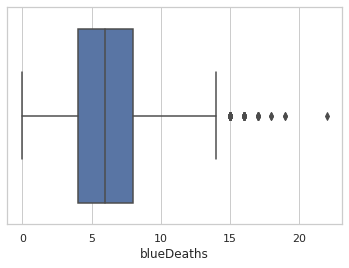

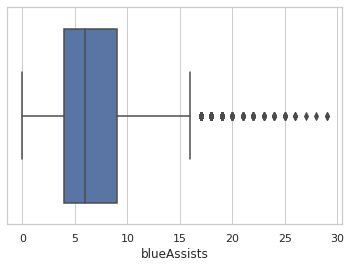

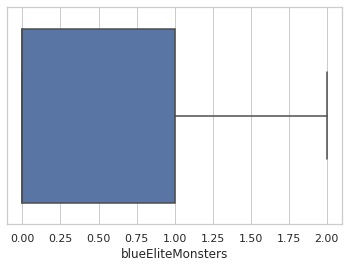

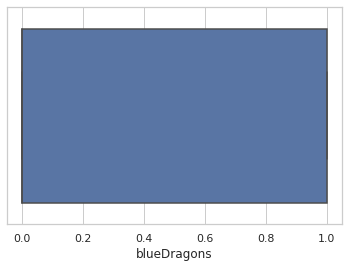

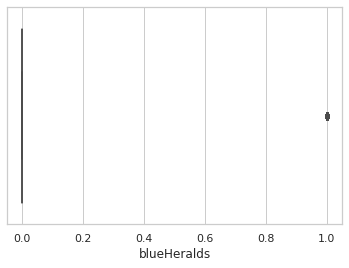

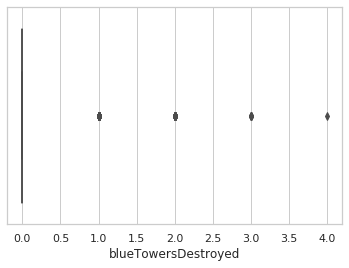

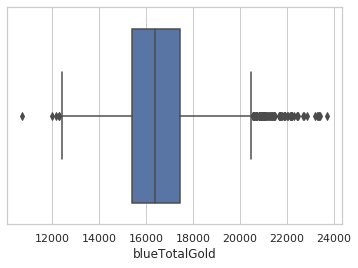

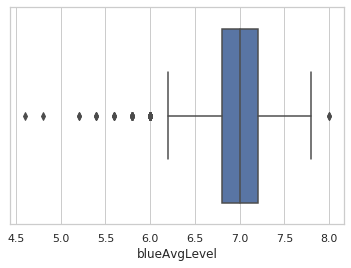

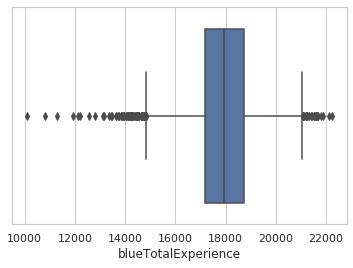

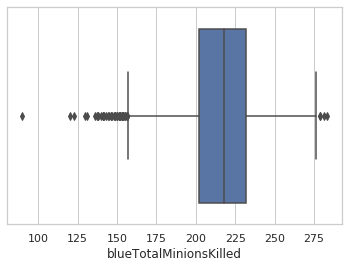

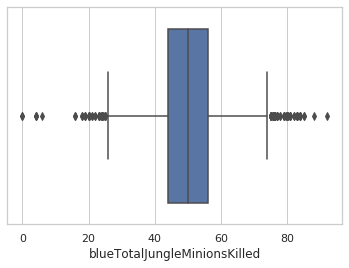

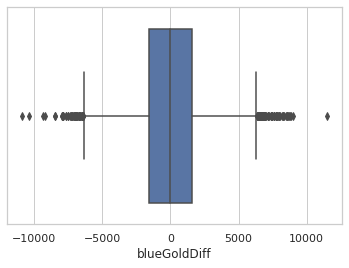

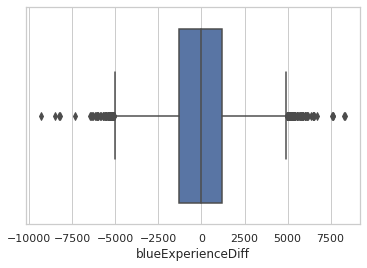

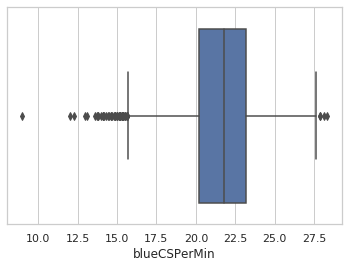

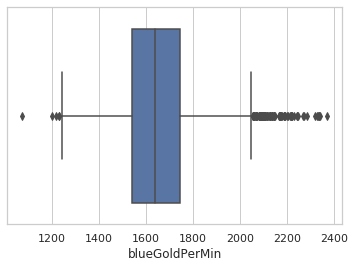

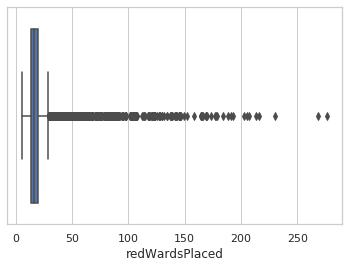

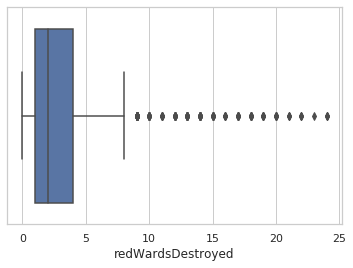

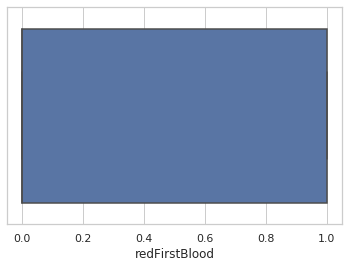

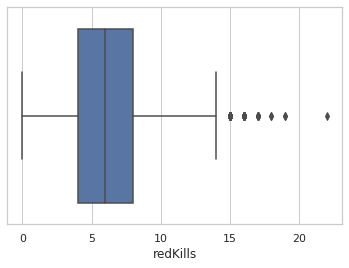

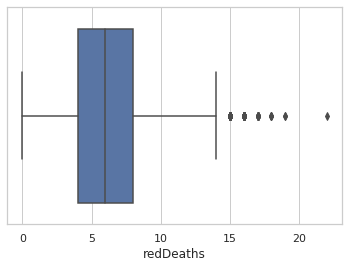

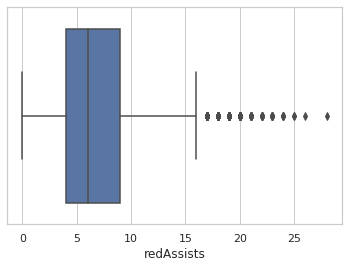

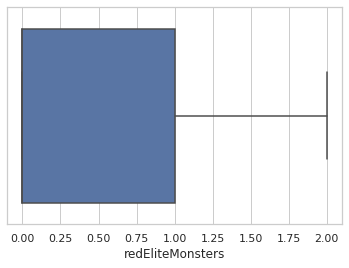

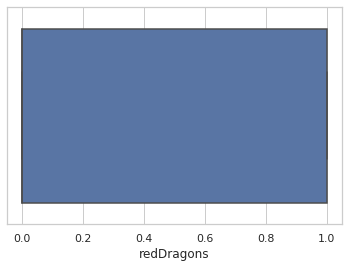

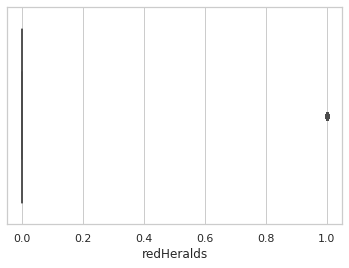

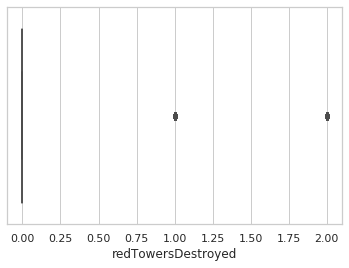

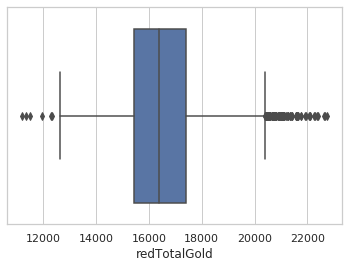

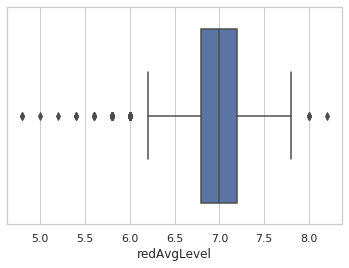

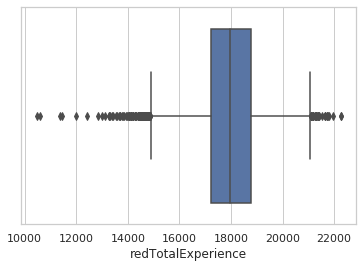

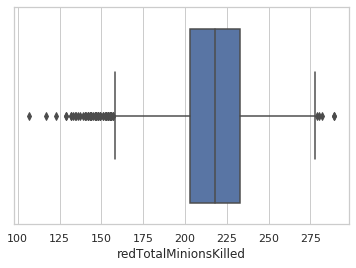

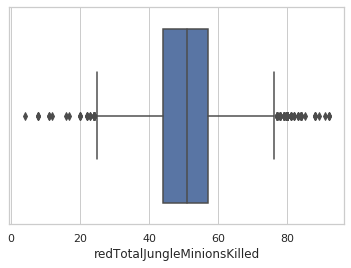

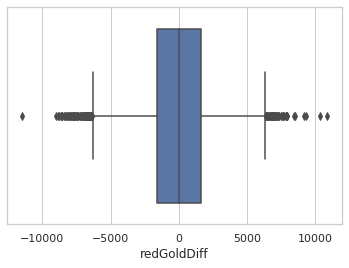

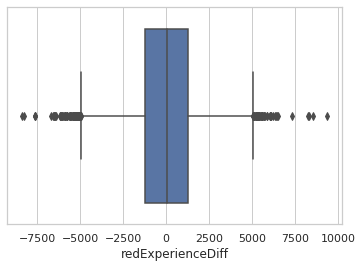

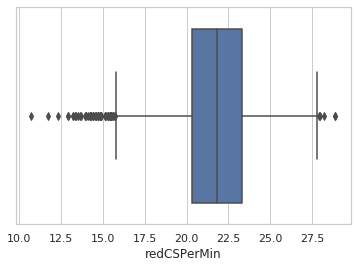

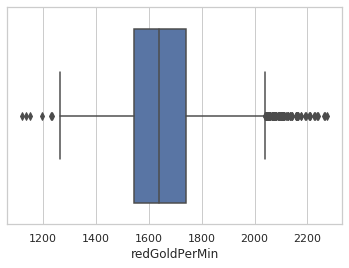

In [16]:
import seaborn as sns
sns.set(style="whitegrid")
#ax = sns.boxplot(x=df["blueKills"])


for column in df:
    plt.figure()
    #df.boxplot([column])
    ax = sns.boxplot(x=df[column])
    #df[column].plot.scatter(x="num",y="total")
    #plt.savefig(column, format="svg")


RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

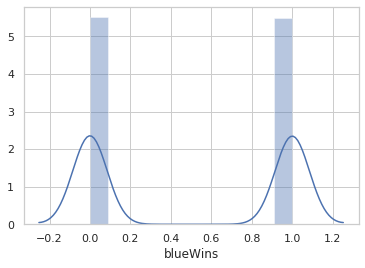

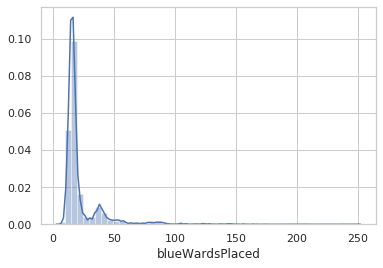

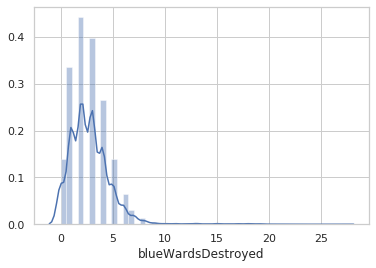

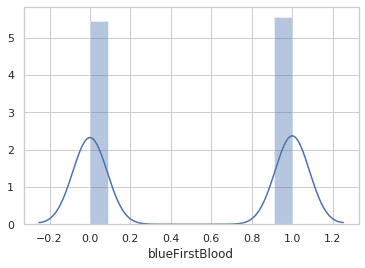

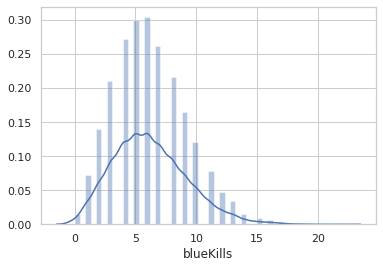

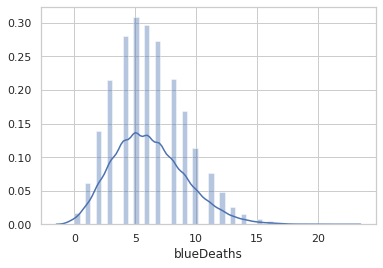

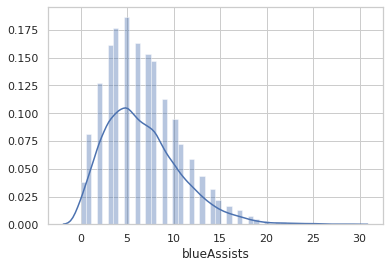

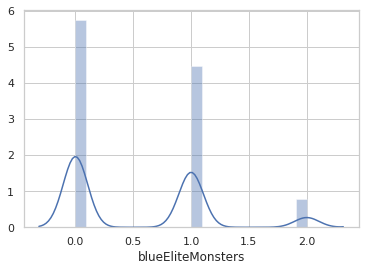

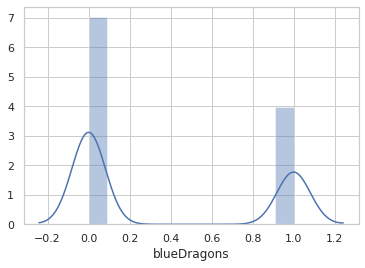

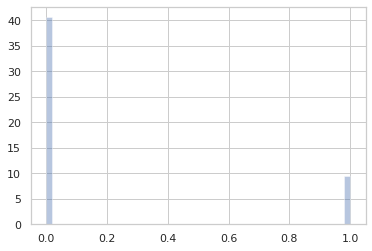

In [17]:
import seaborn as sns
sns.set(style="whitegrid")


for column in df:
    plt.figure()
    #df.boxplot([column])
    ax = sns.distplot(df[column], kde=True, rug=False);
    #df[column].plot.scatter(x="num",y="total")
    #plt.savefig(column, format="svg")


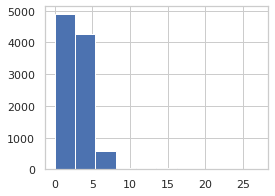

In [18]:
#df['blueDragons'].hist(figsize=(5,5),grid=False, range=[0, 1])
grafica.hist(figsize=(4,3))

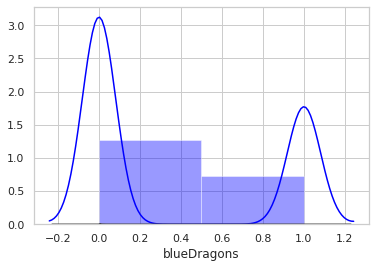

In [19]:
#sns.distplot(df['blueDragons'], kde=True, rug=False, color='blue', bins=2, kde_kws={'bw':1})
sns.distplot(df['blueDragons'], kde=True, rug=False, color='blue', bins=2, fit=invgauss)

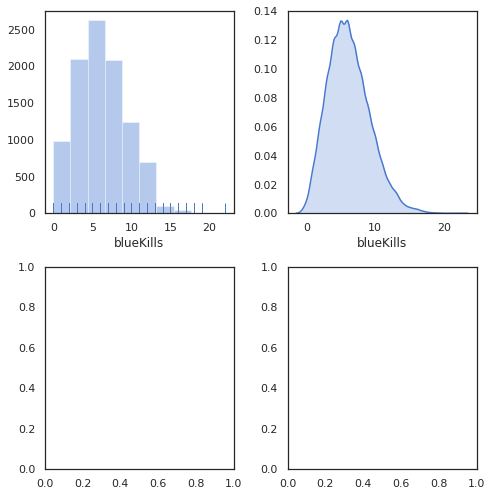

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 7), sharex=False)
#sns.despine(left=True)



grafica = df['blueKills']
# d = dataset
d = grafica
# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="b", kde_kws={"shade": True}, ax=axes[0, 1])

# Plot a histogram and kernel density estimate
bins_needed = 10
sns.distplot(d, kde=False, rug=True ,color="b", bins = bins_needed, ax=axes[0, 0])

#plt.setp(axes, yticks=[])
plt.tight_layout()


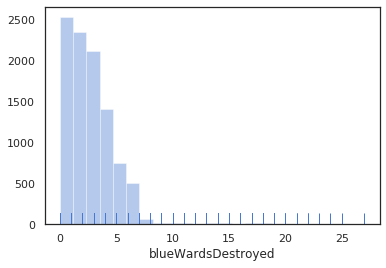

In [21]:
grafica = df['blueWardsDestroyed']
sns.distplot(grafica, kde=False, rug=True, color='b', bins= 23)
